<a href="https://colab.research.google.com/github/Archana-Kallakuri/DMT/blob/main/GNBKfold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
#import the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import statistics as stat


In [44]:
#Loading the data
from google.colab import files
uploaded = files.upload()

Saving framingham.csv to framingham (1).csv


In [45]:
#Store the data
dataSet = df = pd.read_csv('framingham.csv')


In [46]:
#Get the shape of the data
dataSet.shape

(4238, 16)

In [47]:
#Description of the DataFrame
dataSet.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [48]:
dataSet.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [49]:
X=dataSet.drop(['education','TenYearCHD'], axis=1) #Drop 'education' as it is not an important feature for the prediction
# X=dataSet.drop(['education'],axis=1)
y=dataSet['TenYearCHD']

In [50]:
#Check the empty values in each column
X.isna().any()

male               False
age                False
currentSmoker      False
cigsPerDay          True
BPMeds              True
prevalentStroke    False
prevalentHyp       False
diabetes           False
totChol             True
sysBP              False
diaBP              False
BMI                 True
heartRate           True
glucose             True
dtype: bool

In [51]:
#Check the count of empty values in each column
X.isna().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
dtype: int64

In [52]:
X.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0


In [53]:
#Replace all the missing values with mean and store it in X_clean
X_clean=X
from sklearn.impute import SimpleImputer
si=SimpleImputer(strategy='most_frequent')
si.fit(X[['BPMeds']])
pd.DataFrame(si.transform(X[['BPMeds']]))
si2=SimpleImputer(strategy='median')
si2.fit(X)
X_clean=pd.DataFrame(si2.transform(X_clean))
# X=X.drop("BPMeds")
# X_clean = X.apply(lambda x: x.fillna(x.mean())) 
# X_clean.isnull().sum()
print(len(X_clean))

4238


In [54]:
X_clean.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0
1,0.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0
2,1.0,48.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0
3,0.0,61.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0
4,0.0,46.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0


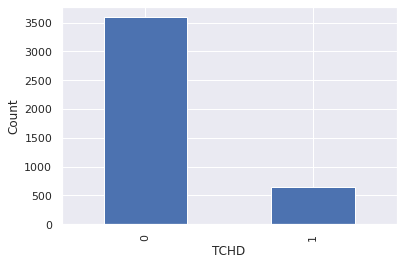

In [55]:
#Check if the data is imbalanced
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
TenYearchd_plot= dataSet['TenYearCHD'].value_counts().plot(kind='bar')
plt.xlabel('TCHD')
plt.ylabel('Count')
plt.show()

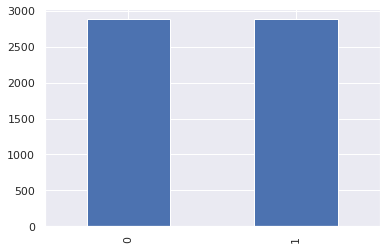

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_clean,y,test_size=0.2,random_state=0)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
# print (len(X_train),len(y_train))

#Balance the data
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_train, y_train = sm.fit_resample(X_train, y_train)
balCHDPlot=y_train.value_counts().plot(kind='bar')
plt.show()

# from imblearn.under_sampling import RandomUnderSampler
# rs= RandomUnderSampler()
# X_train, y_train = rs.fit_resample(X_train, y_train)
# balCHDPlot=y_train.value_counts().plot(kind='bar')
# plt.show()

# X_train.head()

# from sklearn import preprocessing
# from sklearn.model_selection import train_test_split
# scaler = preprocessing.MinMaxScaler()
# scaler.fit(dataSet)
# scaled = scaler.transform(dataSet)
# train = pd.DataFrame(scaled, columns=dataSet.columns)
# temp_train = train
# temp_outcomes = outcomes
# X_train, X_test, y_train, y_test = train_test_split(train, outcomes, test_size=0.2, random_state=42)

In [57]:
#Print the shape
print('X_train shape :' , X_train.shape)
print('X_test shape :' , X_test.shape)
# print('X_val shape:' , X_val.shape)
print('y_train shape :' , y_train.shape)
print('y_test shape is :' , y_test.shape)
# print('y_val shape:' , y_val.shape)

X_train shape : (5768, 14)
X_test shape : (848, 14)
y_train shape : (5768,)
y_test shape is : (848,)


In [58]:
#Scale the data
from sklearn.preprocessing import StandardScaler
# print(len(X_train))
sc=StandardScaler()
X_train=pd.DataFrame(sc.fit_transform(X_train))
X_test=pd.DataFrame(sc.transform(X_test))
X_train.head()
print(len(X_train))

# # Min-Max Scaler
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_train=pd.DataFrame(scaler.fit_transform(X_train))
# X_test=pd.DataFrame(scaler.transform(X_test))
# X_train.head()

5768


In [59]:
#Re-assign the columns
X_train.columns= X.columns   
X_test.columns= X.columns

y_train.index= X_train.index
y_test.index= X_test.index


In [60]:
X_train.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1.154393,1.402163,1.032730,0.048139,-0.218290,-0.111018,-0.832831,5.145692,-0.015477,0.394329,-0.023485,1.117103,-0.098731,1.228807
1,1.154393,0.079699,1.032730,1.704997,-0.218290,-0.111018,-0.832831,-0.210028,-0.397632,-0.150863,-0.188000,-1.243900,-0.874464,-0.229229
2,1.154393,-1.603437,1.032730,0.876568,-0.218290,-0.111018,-0.832831,-0.210028,0.861231,-0.528304,0.223287,0.152392,-0.012539,-0.297045
3,-0.983348,-0.280973,-1.037166,-0.780290,5.530725,-0.111018,1.289234,-0.210028,1.333305,-0.234739,0.305545,0.195550,-0.529694,-0.364861
4,-0.983348,-1.362989,-1.037166,-0.780290,-0.218290,-0.111018,-0.832831,-0.210028,-0.644909,-1.115434,-1.175088,-0.786932,0.763193,0.042033


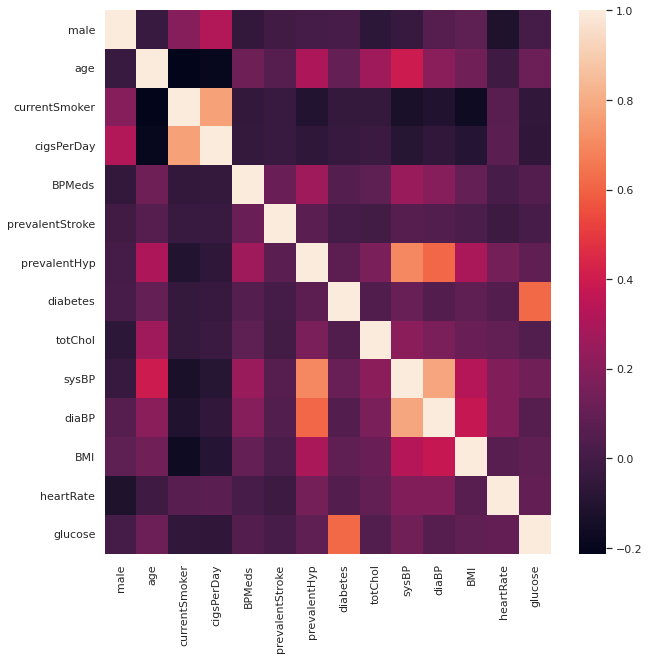

In [61]:
##Pearson correlation map for our features
fig, ax = plt.subplots(figsize = (10, 10)) 
dfCorr  = X.corr() 
sns.heatmap(dfCorr) 
plt.show()

In [62]:
# Implementing Gaussian Naive Bayes

class Gauss_NaiveBayes():
  # X_train,y_train
    def fit(self, features, label): 
        # new array of specified shape and size with zeroes
        new_arr = np.zeros(256, dtype=int) 
        # reshaping array into 1-D
        new_arr[label.ravel()] = 1 
        self.random  = np.nonzero(new_arr)[0]
        self.mean_func(features, label)
        self.stddev_func(features, label)
        self.prior_probability(features, label)

# Calculating the prior probability for each label.
    def prior_probability(self, features, label):
          try:
            self.probability = np.array(features.groupby(label).apply(lambda ele: len(ele)) / features.shape[0])
          # Handling Zero frequency error using Laplacian smoothing
          except ZeroDivisionError:
            print("Prior!")
            return 0.5

          return self.probability

# Function to calculate mean
    def mean_func(self, features,label):
        self.mean_value = np.array(features.groupby(label).mean())
        return self.mean_value

# Function to calculate Standard deviation
    def stddev_func(self, features, label):
        self.var_value = np.array(features.groupby(label).var())    
        return self.var_value

# Function to calculate the Probability density
    def probdensity_func(self, vals, ele):   
        prob_density = (1 / (np.sqrt(2 * np.pi) * self.var_value[vals])) *  np.exp(-((ele-self.mean_value[vals])**2 / (2 * self.var_value[vals]**2 )))   
        prob_density[prob_density == 0] = 1e-20
        return prob_density

# Function to calculate the Posterior probablity
    def postprob_func(self, ele):
        postprob_final = []
        j = 0
        while j < len(self.random):
            postprob = np.sum((np.log(self.probability[j])) + np.log(self.probdensity_func(j, ele)))
            postprob_final.append(postprob)
            j += 1 
        # Classify depending on the max posterior probability
        return self.random[np.argmax(postprob_final)]

# Make predictions on test data using above functions
    def prediction_func(self, features):
        predict = []
        for ele in np.array(features):
          predict.append(self.postprob_func(ele))
        return predict
        
# Calculating th accuracy of predictions
    def accuracy(self, y_test, prediction):
        accuracy = np.sum(y_test == prediction) / len(y_test)
        return accuracy

In [63]:
# Calling and fitting the Gaussian Naive Bayes function
gnb = Gauss_NaiveBayes()
gnb.fit(X_train, y_train)
predict_value = gnb.prediction_func(X_test)
# print(predict_value)
print("Custome NB Accuracy =",gnb.accuracy(y_test, predict_value)*100)


Custome NB Accuracy = 81.13207547169812


In [64]:
# Implement stratified 10-Fold cross validation

from sklearn.model_selection import StratifiedKFold
# from sklearn.model_selection import RepeatedStratifiedKFold
#creating accuracy list
accur=[]
strat_kfold= StratifiedKFold(n_splits=10,random_state=None)
# strat_kfold= RepeatedStratifiedKFold(n_splits=10,random_state=None)
strat_kfold.get_n_splits(X_train,y_train)
for train_index, test_index in strat_kfold.split(X_train,y_train):
    # print("Train", train_index, "Validation", test_index)
    X1_train,X1_test=X_train.iloc[train_index],X_train.iloc[test_index]
    y1_train,y1_test=y_train.iloc[train_index],y_train.iloc[test_index]

    gnb.fit(X1_train, y1_train)
    prediction=gnb.prediction_func(X1_test)
    score=gnb.accuracy(y1_test, prediction)*100
    accur.append(score)
print('Custom Kfold Accuracy:',accur)
print('Mean:', stat.mean(accur))
print('stdev:', stat.stdev(accur))


# print('Accuracy Score for Naive Bayes Classification: ',accur(y1_test,y_pred))
# cm_NB= plot_confusion_matrix(y_test, y_pred_NB, 'Naive Bayes Confusion Matrix')


Custom Kfold Accuracy: [55.45927209705373, 61.35181975736569, 57.019064124783355, 57.19237435008665, 56.499133448873486, 56.1525129982669, 61.35181975736569, 58.925476603119584, 58.68055555555556, 59.548611111111114]
Mean: 58.218063980358174
stdev: 2.093570391072297


In [65]:
import warnings
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

warnings.filterwarnings('ignore')
print("\nConfusion Matrix:")
print(metrics.confusion_matrix(y_test, predict_value, labels=[0,1]))
print("\nClassification Report:")
print(metrics.classification_report(y_test, predict_value, labels=[0,1]))

print('Precision=',precision_score(y_test, predict_value)*100)
print("F1-Score", f1_score(y_test, predict_value, average=None))
print("Recall", recall_score(y_test, predict_value, average=None))


Confusion Matrix:
[[641  69]
 [ 91  47]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       710
           1       0.41      0.34      0.37       138

    accuracy                           0.81       848
   macro avg       0.64      0.62      0.63       848
weighted avg       0.80      0.81      0.80       848

Precision= 40.51724137931034
F1-Score [0.889043   0.37007874]
Recall [0.9028169  0.34057971]


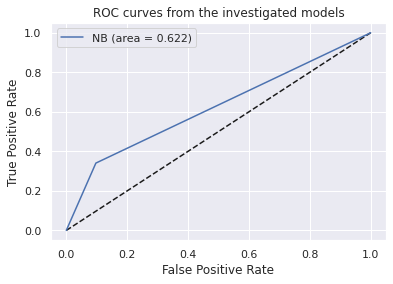

In [69]:
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, 
                             classification_report, f1_score, average_precision_score, precision_recall_fscore_support)

fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, predict_value)
roc_auc_nb = auc(fpr_nb, tpr_nb)
precision_nb, recall_nb, th_nb = precision_recall_curve(y_test, predict_value)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_nb, tpr_nb, label='NB (area = %0.3f)' % roc_auc_nb)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves from the investigated models')
plt.legend(loc='best')
plt.show()

In [67]:
#Implementing Naive Bayes Model using Scikit
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
naiveBayes = GaussianNB()
naiveBayes.fit(X_train, y_train)
y_pred_NB = naiveBayes.predict(X_test)
accuracy_SciNB=accuracy_score(y_test,y_pred_NB)
print('Accuracy NB Scikit: ',accuracy_score(y_test,y_pred_NB))
# cm_NB= plot_confusion_matrix(y_test, y_pred_NB, 'Naive Bayes Confusion Matrix')

Accuracy NB Scikit:  0.7959905660377359


In [68]:
#10-fold on scikit NB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold 
# from sklearn.model_selection import RepeatedStratifiedKFold


#creating accuracy list
accur=[]

# strat_kfold= RepeatedStratifiedKFold(n_splits=10,random_state=None)
strat_kfold= StratifiedKFold(n_splits=10,random_state=None)
strat_kfold.get_n_splits(X_train,y_train)
for train_index, test_index in strat_kfold.split(X_train,y_train):
    # print("Train", train_index, "Validation", test_index)
    X1_train,X1_test=X_train.iloc[train_index],X_train.iloc[test_index]
    y1_train,y1_test=y_train.iloc[train_index],y_train.iloc[test_index]

    naiveBayes.fit(X1_train, y1_train)
    y_pred = naiveBayes.predict(X1_test)
    score=accuracy_score(y1_test, y_pred)*100
    accur.append(score)
print('Scikit Kfold accuracy: ',accur)
print('Mean:', stat.mean(accur))
print('stdev:', stat.stdev(accur))


Scikit Kfold accuracy:  [58.925476603119584, 63.258232235701904, 58.05892547660312, 60.65857885615251, 59.44540727902946, 58.05892547660312, 63.258232235701904, 63.084922010398614, 59.548611111111114, 61.80555555555556]
Mean: 60.610286683997685
stdev: 2.106065926409969
